# Predict Churn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("user_data.csv")

In [3]:
df

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost
0,39511.0,2020-09-09T00:00:00,31.0,2021-06-30,NaN,0,HOME_INSURANCE,155.0,NaN
1,54361.0,2021-06-15T00:00:00,31.0,NaN,NaN,0,HOME_INSURANCE,279.0,NaN
2,217977.0,2019-03-03T00:00:00,34.0,NaN,NaN,0,HOME_INSURANCE,228.0,NaN
3,252748.0,2019-08-04T00:00:00,36.0,2020-07-31,NaN,0,HOME_INSURANCE,239.0,NaN
4,275928.0,2020-03-19T00:00:00,34.0,NaN,Trygg-Hansa,0,HOME_INSURANCE,173.0,NaN
...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18T00:00:00,25.0,NaN,NaN,0,PHONE_INSURANCE,26.0,NaN
15996,688741553.0,2019-05-24T00:00:00,53.0,2020-07-20,Trygg-Hansa,0,HOME_INSURANCE,298.0,NaN
15997,688745399.0,2019-12-14T00:00:00,29.0,2021-01-08,Folksam,0,HOME_INSURANCE,216.0,NaN
15998,688751211.0,2021-03-04T00:00:00,42.0,NaN,NaN,0,HOME_INSURANCE,222.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   16000 non-null  float64
 1   signed_on                 16000 non-null  object 
 2   age                       15990 non-null  float64
 3   cancellation_date         3795 non-null   object 
 4   switched_insurance_from   2231 non-null   object 
 5   nr_of_referred_customers  16000 non-null  int64  
 6   policy_type               16000 non-null  object 
 7   monthly_premium           16000 non-null  float64
 8   claims_cost               306 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


## Add column for churn - Target Variable

In [5]:
df["churn"] = df["cancellation_date"]

In [6]:
df["churn"] = df["churn"].fillna(0)

In [7]:
def f_churn(i):
    
    if i == 0:
        return "No"
    else:
        return "Yes"

In [8]:
df["churn"] = df["churn"].apply(lambda x: f_churn(x))

## Outliers

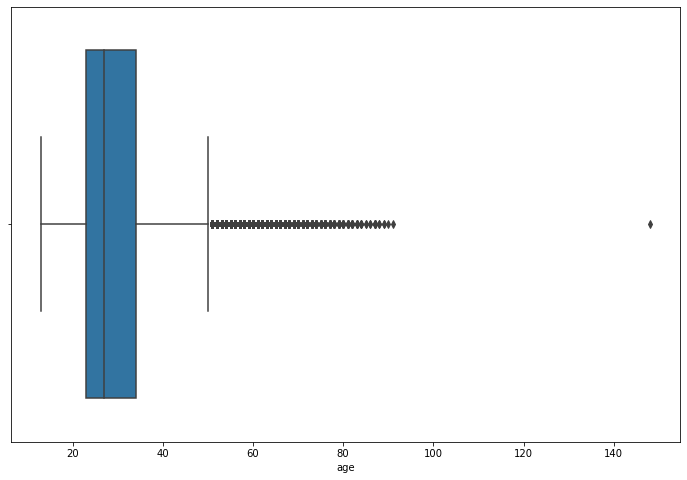

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age")
plt.show()

In [10]:
df.loc[df.age > 100]

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
8031,343750233.0,2020-05-14T00:00:00,148.0,2020-09-30,NaN,0,HOME_INSURANCE,168.0,NaN,Yes


In [11]:
df.drop(index=8031, inplace=True)

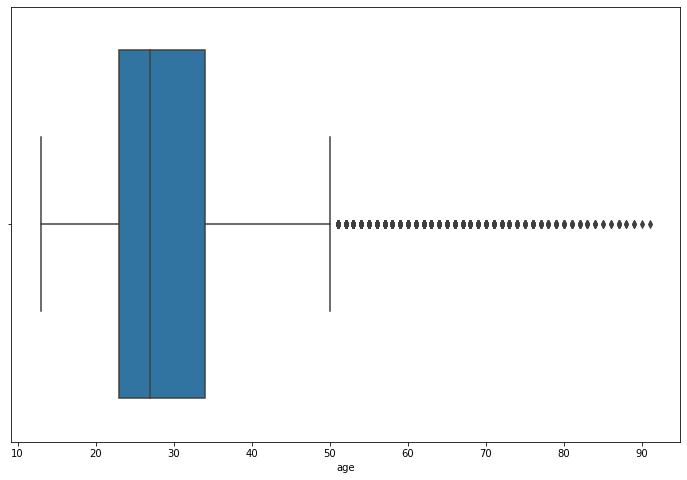

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="age")
plt.show()

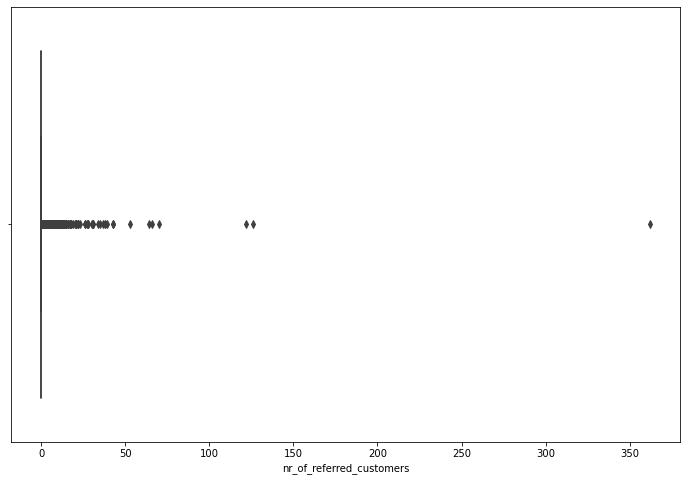

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="nr_of_referred_customers")
plt.show()

In [14]:
df.loc[df.nr_of_referred_customers > 100]

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
4597,195574023.0,2020-04-10T00:00:00,27.0,NaN,NaN,122,PHONE_INSURANCE,35.0,NaN,No
7865,336555110.0,2020-12-10T00:00:00,28.0,NaN,NaN,126,HOME_INSURANCE,191.0,NaN,No
15977,688108493.0,2019-03-26T00:00:00,28.0,NaN,NaN,362,HOME_INSURANCE,124.0,NaN,No


In [15]:
df.drop(index=[4597,7865,15977], inplace=True)

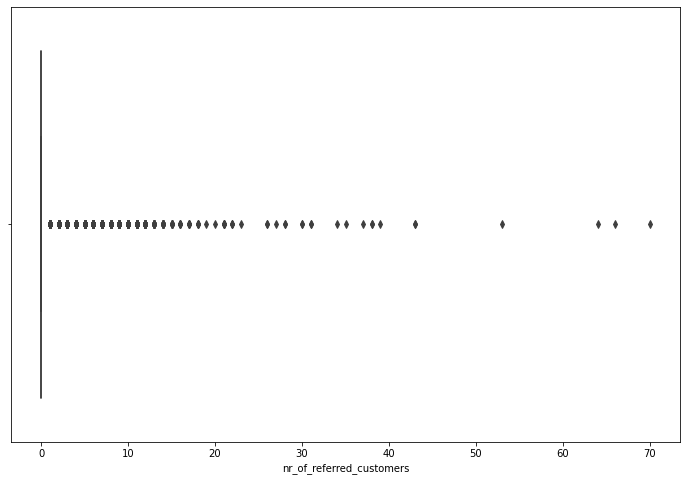

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df, x="nr_of_referred_customers")
plt.show()

## Feature Engineering

In [17]:
# Asuming that nan for swiched insurance did not have an insurance before
df["switched_insurance_from"] = df.switched_insurance_from.fillna("First insurance")

In [18]:
df

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn
0,39511.0,2020-09-09T00:00:00,31.0,2021-06-30,First insurance,0,HOME_INSURANCE,155.0,NaN,Yes
1,54361.0,2021-06-15T00:00:00,31.0,NaN,First insurance,0,HOME_INSURANCE,279.0,NaN,No
2,217977.0,2019-03-03T00:00:00,34.0,NaN,First insurance,0,HOME_INSURANCE,228.0,NaN,No
3,252748.0,2019-08-04T00:00:00,36.0,2020-07-31,First insurance,0,HOME_INSURANCE,239.0,NaN,Yes
4,275928.0,2020-03-19T00:00:00,34.0,NaN,Trygg-Hansa,0,HOME_INSURANCE,173.0,NaN,No
...,...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18T00:00:00,25.0,NaN,First insurance,0,PHONE_INSURANCE,26.0,NaN,No
15996,688741553.0,2019-05-24T00:00:00,53.0,2020-07-20,Trygg-Hansa,0,HOME_INSURANCE,298.0,NaN,Yes
15997,688745399.0,2019-12-14T00:00:00,29.0,2021-01-08,Folksam,0,HOME_INSURANCE,216.0,NaN,Yes
15998,688751211.0,2021-03-04T00:00:00,42.0,NaN,First insurance,0,HOME_INSURANCE,222.0,NaN,No


#### Time as customer 

In [19]:
df.signed_on

0        2020-09-09T00:00:00
1        2021-06-15T00:00:00
2        2019-03-03T00:00:00
3        2019-08-04T00:00:00
4        2020-03-19T00:00:00
                ...         
15995    2020-11-18T00:00:00
15996    2019-05-24T00:00:00
15997    2019-12-14T00:00:00
15998    2021-03-04T00:00:00
15999    2020-09-15T00:00:00
Name: signed_on, Length: 15996, dtype: object

In [20]:
df.signed_on = pd.to_datetime(df.signed_on)

In [21]:
today = pd.to_datetime("2021-09-21")

In [22]:
df["time_as_cust"] = today - df.signed_on

In [23]:
df["time_as_cust"] = df["time_as_cust"].astype("string")

In [24]:
df["time_as_cust"] = df["time_as_cust"].str.replace("days","")

In [25]:
df

,user_id,signed_on,age,cancellation_date,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn,time_as_cust
0,39511.0,2020-09-09,31.0,2021-06-30,First insurance,0,HOME_INSURANCE,155.0,NaN,Yes,377
1,54361.0,2021-06-15,31.0,NaN,First insurance,0,HOME_INSURANCE,279.0,NaN,No,98
2,217977.0,2019-03-03,34.0,NaN,First insurance,0,HOME_INSURANCE,228.0,NaN,No,933
3,252748.0,2019-08-04,36.0,2020-07-31,First insurance,0,HOME_INSURANCE,239.0,NaN,Yes,779
4,275928.0,2020-03-19,34.0,NaN,Trygg-Hansa,0,HOME_INSURANCE,173.0,NaN,No,551
...,...,...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18,25.0,NaN,First insurance,0,PHONE_INSURANCE,26.0,NaN,No,307
15996,688741553.0,2019-05-24,53.0,2020-07-20,Trygg-Hansa,0,HOME_INSURANCE,298.0,NaN,Yes,851
15997,688745399.0,2019-12-14,29.0,2021-01-08,Folksam,0,HOME_INSURANCE,216.0,NaN,Yes,647
15998,688751211.0,2021-03-04,42.0,NaN,First insurance,0,HOME_INSURANCE,222.0,NaN,No,201


## Null values

In [26]:
df.isna().sum()

user_id                         0
signed_on                       0
age                            10
cancellation_date           12202
switched_insurance_from         0
nr_of_referred_customers        0
policy_type                     0
monthly_premium                 0
claims_cost                 15690
churn                           0
time_as_cust                    0
dtype: int64

In [27]:
df.drop(columns=["cancellation_date"],inplace=True)

In [28]:
df.claims_cost = df.claims_cost.fillna(0)

In [29]:
df = df.dropna()

In [30]:
df

,user_id,signed_on,age,switched_insurance_from,nr_of_referred_customers,policy_type,monthly_premium,claims_cost,churn,time_as_cust
0,39511.0,2020-09-09,31.0,First insurance,0,HOME_INSURANCE,155.0,0.0,Yes,377
1,54361.0,2021-06-15,31.0,First insurance,0,HOME_INSURANCE,279.0,0.0,No,98
2,217977.0,2019-03-03,34.0,First insurance,0,HOME_INSURANCE,228.0,0.0,No,933
3,252748.0,2019-08-04,36.0,First insurance,0,HOME_INSURANCE,239.0,0.0,Yes,779
4,275928.0,2020-03-19,34.0,Trygg-Hansa,0,HOME_INSURANCE,173.0,0.0,No,551
...,...,...,...,...,...,...,...,...,...,...
15995,688733894.0,2020-11-18,25.0,First insurance,0,PHONE_INSURANCE,26.0,0.0,No,307
15996,688741553.0,2019-05-24,53.0,Trygg-Hansa,0,HOME_INSURANCE,298.0,0.0,Yes,851
15997,688745399.0,2019-12-14,29.0,Folksam,0,HOME_INSURANCE,216.0,0.0,Yes,647
15998,688751211.0,2021-03-04,42.0,First insurance,0,HOME_INSURANCE,222.0,0.0,No,201


In [31]:
df["signed_on"] = pd.to_datetime(df.signed_on)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## X and y

In [32]:
target = "churn"

X = df.drop(columns=["churn","user_id","signed_on"])
y = df[target]

In [33]:
X = pd.get_dummies(X, drop_first=True)

In [34]:
y = y.map({"Yes":1,"No":0})

## Test, train, split

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Pipeline for preprocessing

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
from sklearn.pipeline import make_pipeline

In [42]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier()]

In [43]:
for algo in classifiers:
    
    pipe = make_pipeline(StandardScaler(), algo)
    
    grid = GridSearchCV(estimator=pipe, param_grid = {}, cv=5)
    
    grid.fit(X_train, y_train)
    
    print(f"Train score for {algo}: {grid.best_score_}")

Train score for LogisticRegression(): 0.7672817386725733
Train score for DecisionTreeClassifier(): 0.6753985670879092
Train score for RandomForestClassifier(): 0.7438999719606422
Train score for SVC(): 0.7636848119329637
Train score for KNeighborsClassifier(): 0.734906248557135


## GridSearch

### LogReg()
- testing for recall since I want to minimize the false negatives

In [44]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [45]:
LogisticRegression()

LogisticRegression()

In [71]:
param_grid_logreg = {"logisticregression__C":[0.0001,0.001,0.01,0.1,1,10,100,1000]}

grid_logreg = GridSearchCV(estimator=pipe, param_grid = param_grid_logreg, cv=5, scoring="recall")

grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000]},
             scoring='recall')

In [72]:
print("Best score:", grid_logreg.best_score_)
print("Best params:", grid_logreg.best_params_)

Best score: 0.15568672694588287
Best params: {'logisticregression__C': 100}


## Best model

In [73]:
best_model = grid_logreg.best_estimator_

In [74]:
best_model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=100, max_iter=1000))])

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [76]:
y_test_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

In [77]:
print(f"Accuracy score: {accuracy}")
print(f"Precision score: {precision}")
print(f"Recall score: {recall}")

Accuracy score: 0.7723577235772358
Precision score: 0.510548523206751
Recall score: 0.165075034106412


In [78]:
from sklearn.metrics import plot_confusion_matrix

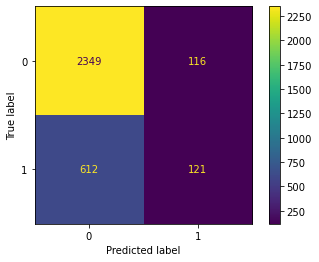

In [79]:
plot_confusion_matrix(estimator=best_model, X=X_test, y_true= y_test)

In [80]:
# True negative = 2349
# True positive = 121 